In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import git

import uproot as ut
import awkward as ak
import numpy as np
import math
import vector
import sympy as sp

import re
from tqdm import tqdm
import timeit

sys.path.append( git.Repo('.', search_parent_directories=True).working_tree_dir )
from utils import *

import utils.torchUtils as gnn

plt.style.use('science')


In [2]:
module = fc.eightb.preselection.ranked_quadh
signal = ObjIter([Tree(module.NMSSM_XYY_YToHH_8b_MX_1000_MY_450, use_gen=False), Tree(module.NMSSM_XYY_YToHH_8b_MX_700_MY_300, use_gen=False)])
qcd = ObjIter([Tree(module.Bkg_MC_List, use_gen=False)])

100%|██████████| 17/17 [00:06<00:00,  2.76it/s]


In [3]:
(signal+qcd).apply(lambda t:build_collection(t, 'H\dY\d_b\d', 'jet', ptordered=True))

[None, None, None]

In [4]:
varinfo.clear()
for s in signal: s.color = None

In [5]:
(signal+qcd).apply(lambda t : t.extend(X_E=np.sqrt( t.X_m**2 + t.X_pt**2 )))

[None, None, None]

# Standardizing Jet variables using X
Defining 
$$E_X = \sqrt{M_X^2 + P_{T,X}^2}$$

We can use this variable to standardize the jet pt and m to this new energy scale, event by event.
$$Jet P_{T, rel} = Jet P_{T}/E_X$$
$$Jet M_{rel}    = Jet M/E_X$$
We can also look at at standardizing the positional coordinatates in each event by taking the difference to the X eta and phi
$$Jet \eta_{rel} = \Delta(Jet \eta,\eta_X)$$
$$Jet \phi_{rel} = \Delta(Jet \phi,\phi_X)$$

100%|██████████| 3/3 [00:01<00:00,  2.67it/s]


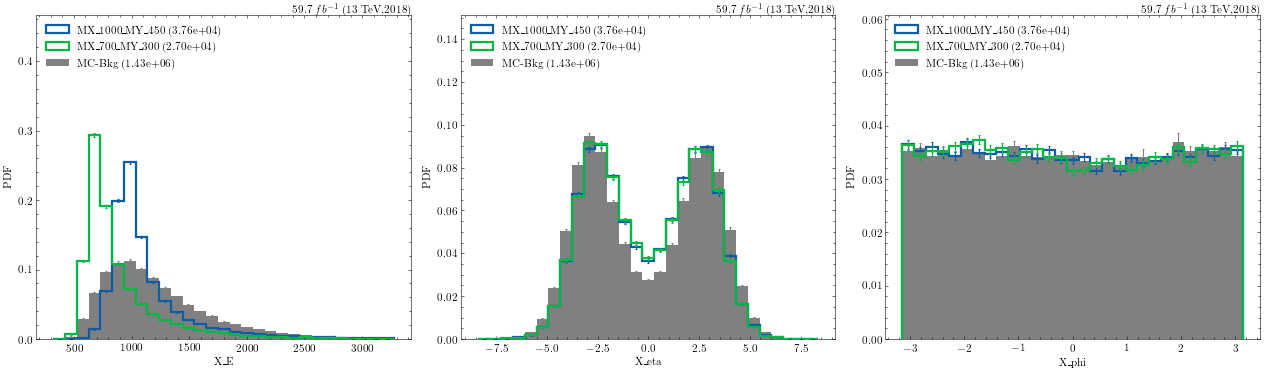

In [10]:
study.quick(
  signal+qcd, stacked=True, legend=True,
  varlist=['X_E','X_eta','X_phi'],
  efficiency=True,
  dim=(-1,3),
)

In [7]:
class jet_relpt(ObjTransform):
  def init(self):
    self.xlabel = f'jet_relpt {self.i}'
  def __call__(self, t):
    return t.jet_ptRegressed[:,self.i]/t.X_E

class jet_relm(ObjTransform):
  def init(self):
    self.xlabel = f'jet_relm {self.i}'
  def __call__(self, t):
    return t.jet_mRegressed[:,self.i]/t.X_E

class jet_rele(ObjTransform):
  def init(self):
    self.xlabel = f'jet_relE {self.i}'
  def __call__(self, t):
    jet_E = np.sqrt(t.jet_mRegressed**2 + t.jet_ptRegressed**2)
    return jet_E[:,self.i]/t.X_E

class jet_relphi(ObjTransform):
  def init(self):
    self.xlabel = f'jet_relphi {self.i}'
  def __call__(self, t):
    return calc_dphi(t.jet_phi[:,self.i], t.X_phi)

class jet_releta(ObjTransform):
  def init(self):
    self.xlabel = f'jet_releta {self.i}'
  def __call__(self, t):
    return calc_deta(t.jet_eta[:,self.i], t.X_eta)

# Jet P4 variables before standardizing

100%|██████████| 32/32 [00:11<00:00,  2.75it/s]


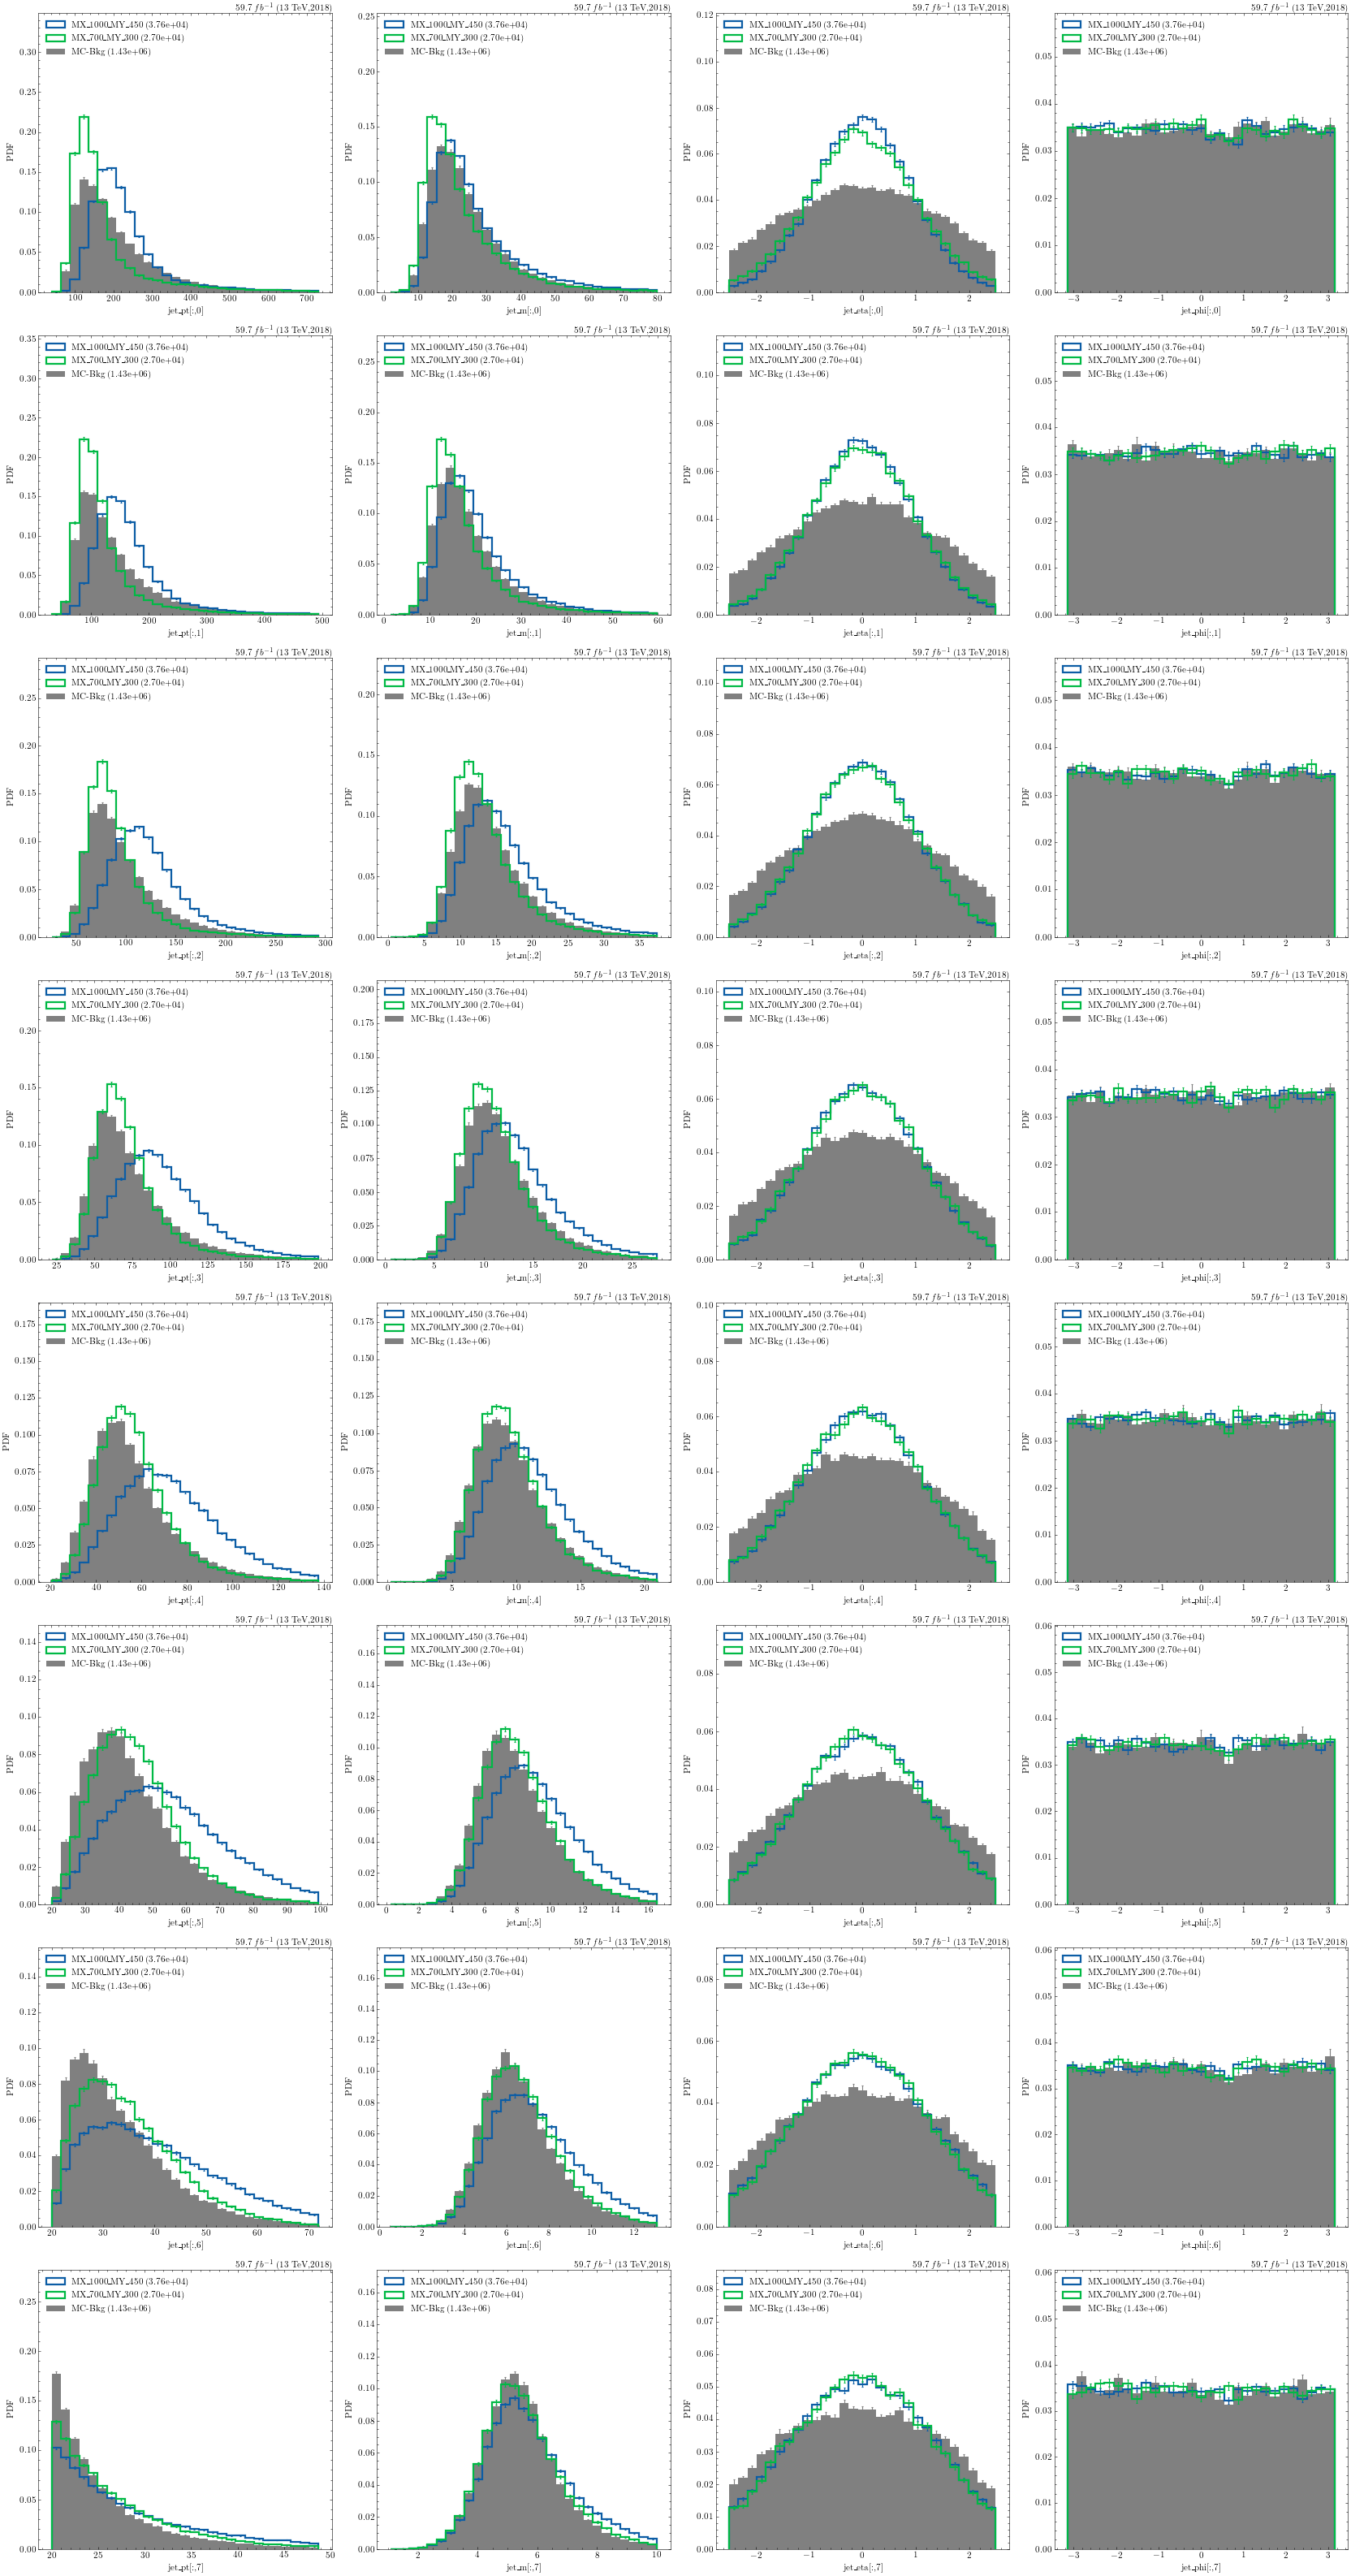

In [8]:
study.quick(
  signal+qcd, stacked=True, legend=True,
  varlist=[ f'{jet_var}[:,{i}]' for i in range(8) for jet_var in ('jet_pt', 'jet_m', 'jet_eta', 'jet_phi') ],
  dim=(-1, 4),
  efficiency=True,
)

# After Standardizing

100%|██████████| 32/32 [00:12<00:00,  2.64it/s]


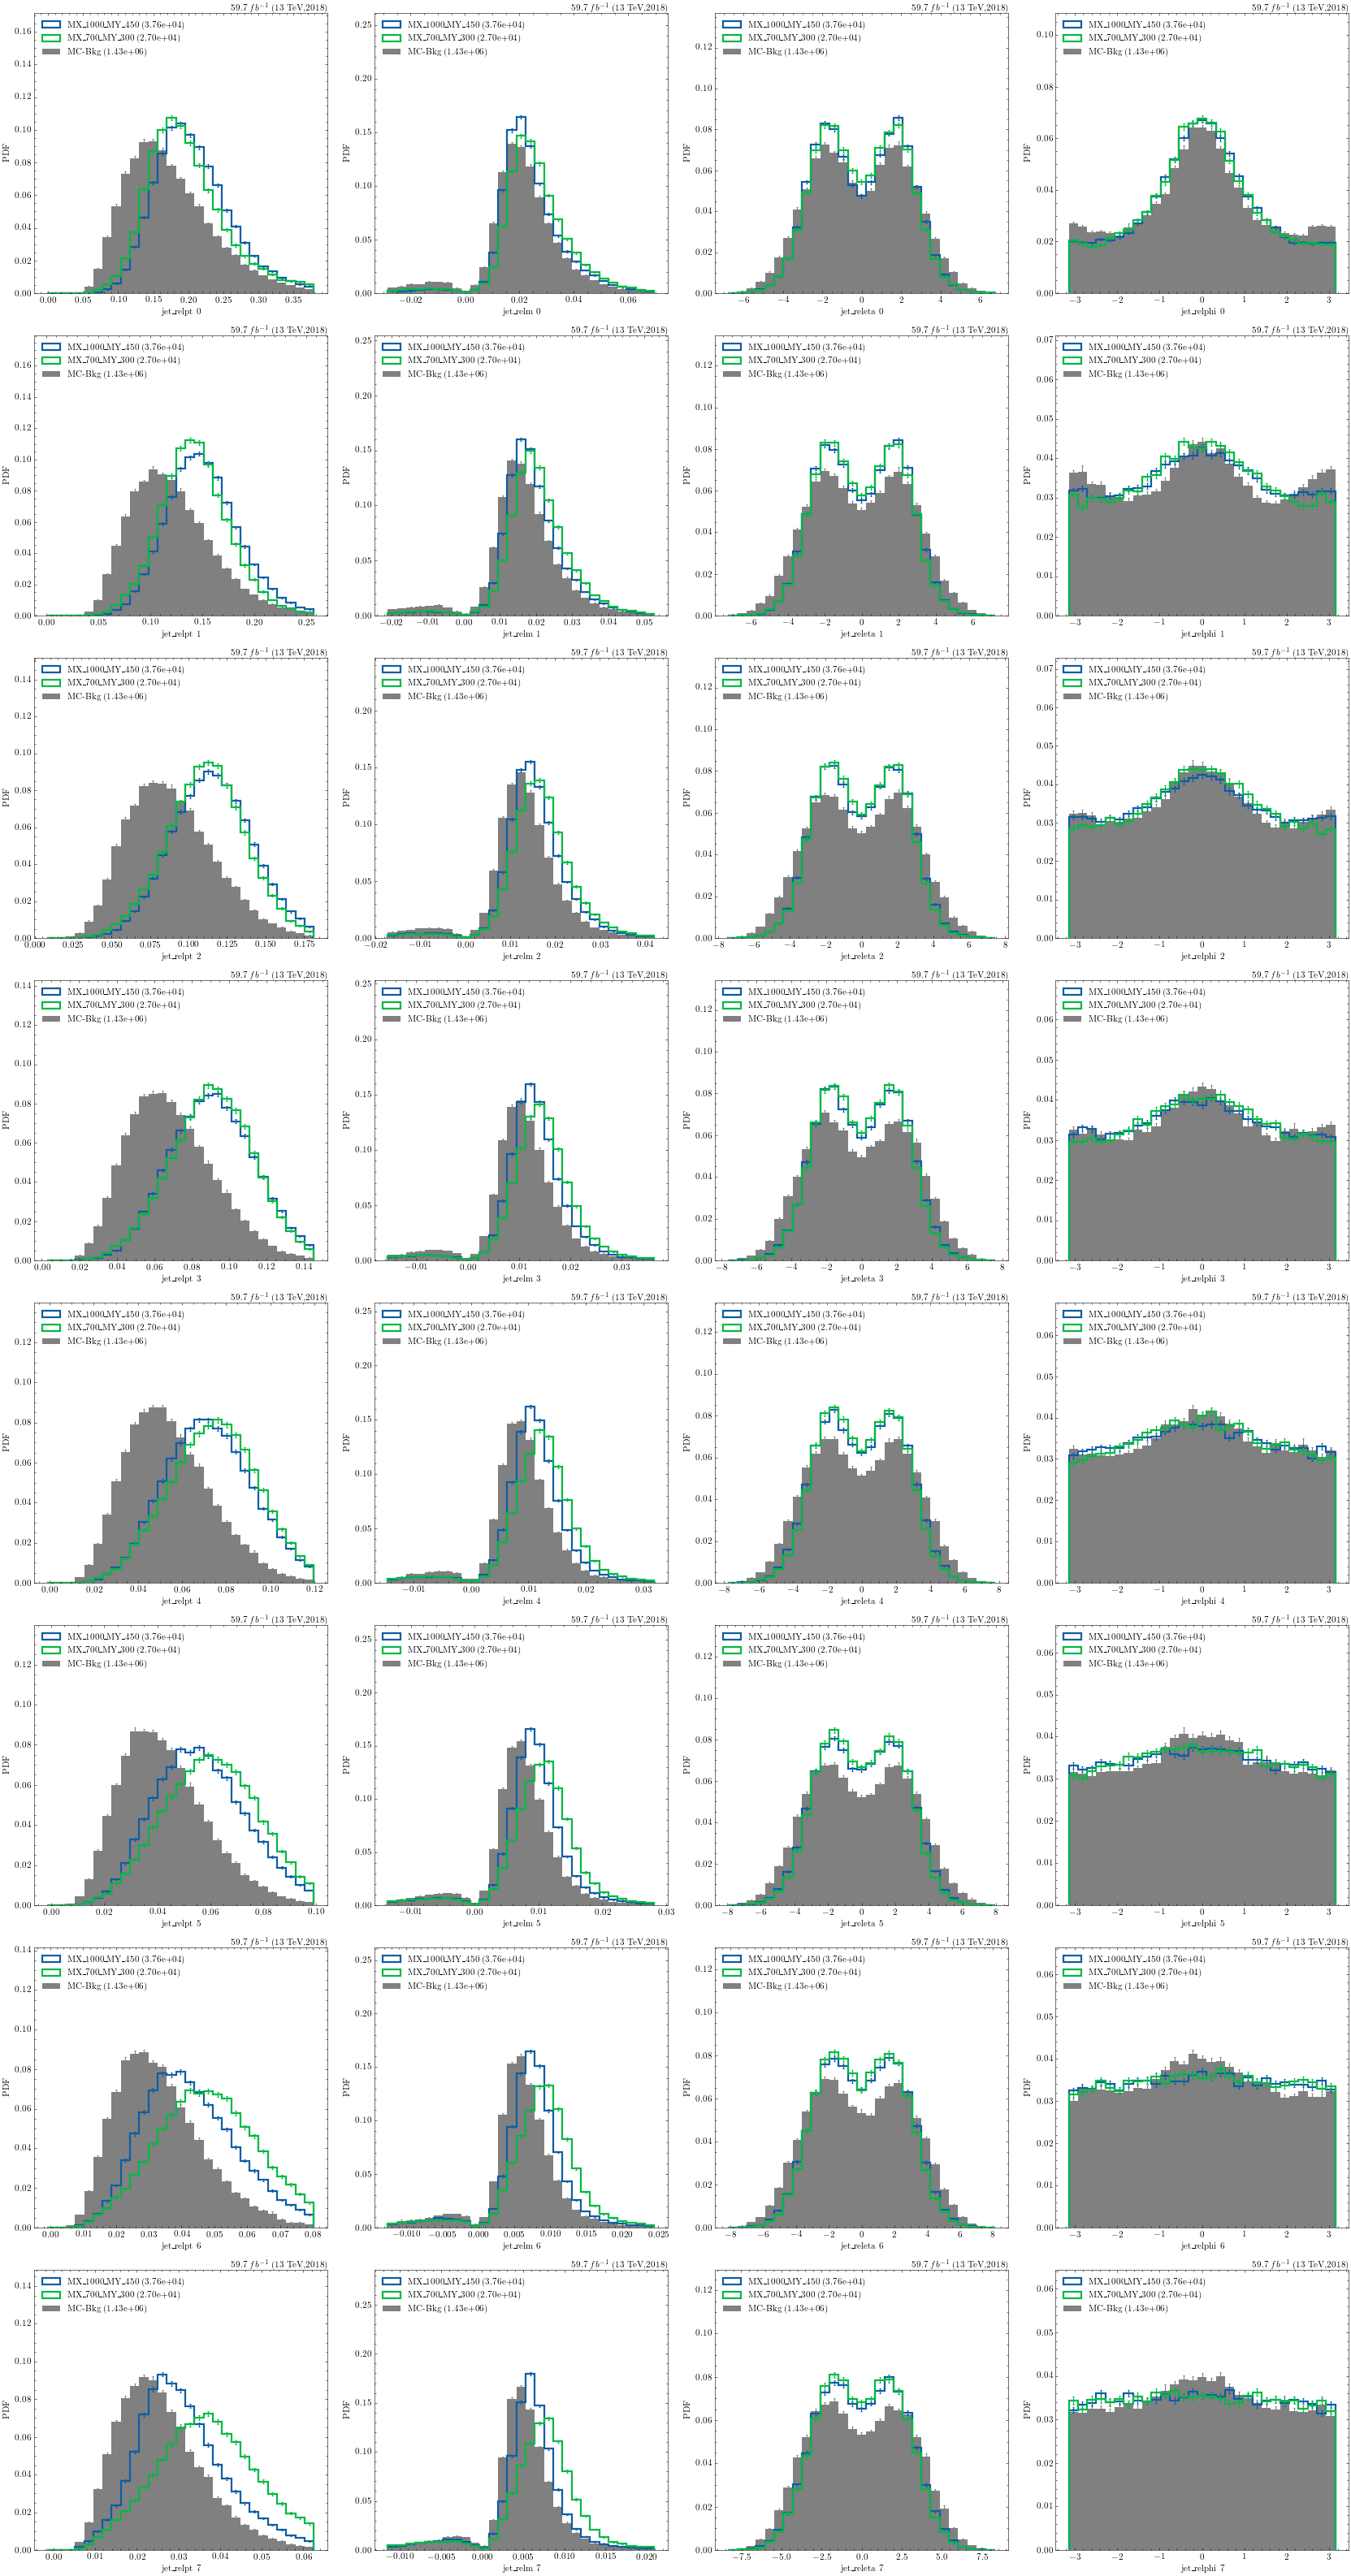

In [9]:
study.quick(
  signal+qcd, stacked=True, legend=True,
  varlist=[ jet_var(i=i) for i in range(8) for jet_var in (jet_relpt, jet_relm, jet_releta, jet_relphi) ],
  dim=(-1, 4),
  efficiency=True,
)